# Monte Carlo experiments
The Monte Carlo method is a way of using random numbers to solve problems that can otherwise be quite complicated. Essentially, the idea is to replace uncertain values with a large list of values, assume those values have no uncertaintly, and compute a large list of results. Analysis of the results can often lead you to the solution to the original problem.

The following story is based on the Dart method, described in the following book by Thijsse, J. M. (2006), Computational Physics, Cambridge University Press, p. 273, ISBN 978-0-521-57588-1

### Approximating $\pi$

Let's use the Monte Carlo method to approximate $\pi$. First, the area of a circle is $A = \pi r^2,$
so that the unit circle ($r=1$) has an area $A = \pi$. Second, we define the square domain in which the unit circle just fits (2x2), and plot both:

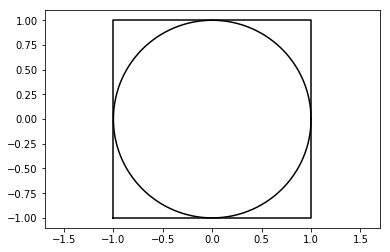

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform

def circle():
    theta = np.linspace(0, 2*np.pi, num=1000)
    x = [np.cos(n) for n in theta]
    y = [np.sin(n) for n in theta]
    return x, y

def square():
    x = [-1,1,1,-1,-1]
    y = [-1,-1,1,1,-1]
    return x, y

plt.plot(*circle(), 'k')
plt.plot(*square(), 'k')
plt.axis('equal')
plt.show()

Consider a random point (x,y) inside the square.

**The probability that a random point from a square domain lies inside the biggest circle that fits inside the square is equal to the area of the circle divided by the area of the square.** 

Our square is $2\times 2=4$ and our circle has an area of $\pi$, so if we pick many points, statistically, we expect $\pi/4$ of them to fall inside the circle.  

### Our first few points

Let's create a function that will give us random points from a uniform distribution inside the square domain, and generate a few random points.

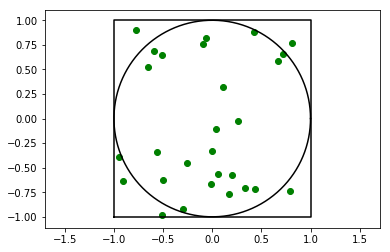

In [4]:
np.random.seed(seed=345)  # remove/change the seed if you want different random numbers

def monte_carlo(n):
    x = uniform.rvs(loc=-1, scale=2, size=n)
    y = uniform.rvs(loc=-1, scale=2, size=n)
    return x, y

mc_x, mc_y = monte_carlo(28)
plt.plot(*circle(), 'k')
plt.plot(*square(), 'k')
plt.scatter(mc_x, mc_y, c='green')
plt.axis('equal')
plt.show()

Let's colour the points depending on whether they are within 1 unit of the origin or not:

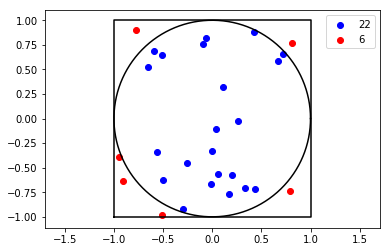

In [12]:
def dist(x, y):
    return np.sqrt(x**2 + y**2)

def inside(x, y):
    return dist(x, y) < 1

def outside(x, y):
    return dist(x, y) > 1

np.random.seed(seed=345)  # remove the command or change the value if you want different random numbers

x, y = monte_carlo(28)
ins = inside(x, y)
outs = outside(x, y)

plt.plot(*square(), 'k')
plt.plot(*circle(), 'k')
plt.scatter(x[ins], y[ins], c='blue',label=len(x[ins]))
plt.scatter(x[outs], y[outs], c='red', label=len(x[outs]))
plt.axis('equal')
plt.legend()
plt.show()

If you left the np.random seed as 345, and generated 28 points, then your output should have 22 blue points (inside the circle) and 6 red points (outside the circle).

So, if 22 out of 28 (around 76%) of the points are inside the circle, we can approximate $\pi$ from this.

$$
\begin{align}
\pi \approx 4(22/28) = 22/7 = 3.142857.
\end{align}
$$

$22/7$ is a common approximation of $\pi$, and this seed value happens to get us to this ratio. If you vary the random seed, however, you will see that this ratio for only a small number of points can vary quite a lot!

To produce a more robust approximation for $\pi$, we will need many more random points.

### 250 points

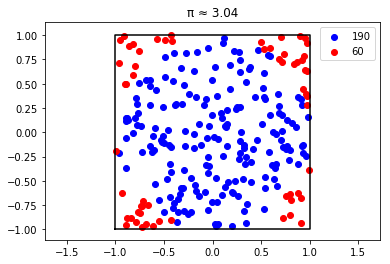

In [9]:
x, y = monte_carlo(250)
ins = inside(x, y)
outs = outside(x, y)
pi = 4 * len(x[ins])/len(x)

plt.plot(*square(), 'k')
plt.scatter(x[ins], y[ins], c='blue', label=len(x[ins]))
plt.scatter(x[outs], y[outs], c='red', label=len(x[outs]))
plt.axis('equal')
plt.legend()
plt.title('π ≈ {}'.format(pi))
plt.show()

### 1000 points

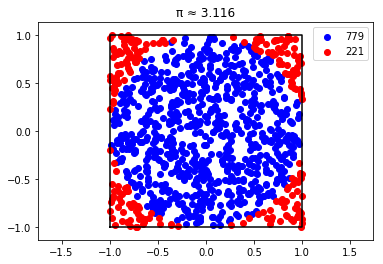

In [10]:
x, y = monte_carlo(1000)
ins = inside(x, y)
outs = outside(x, y)
pi = 4 * len(x[ins])/len(x)

plt.plot(*square(), 'k')
plt.scatter(x[ins], y[ins], c='blue', label=len(x[ins]))
plt.scatter(x[outs], y[outs], c='red', label=len(x[outs]))
plt.axis('equal')
plt.legend()
plt.title('π ≈ {}'.format(pi))
plt.show()

## 25000 points

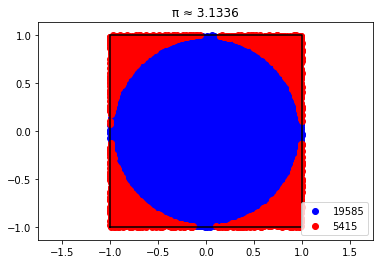

In [14]:
x, y = monte_carlo(25000)
ins = inside(x, y)
outs = outside(x, y)
pi = 4 * len(x[ins])/len(x)

plt.plot(*square(), 'k')
plt.scatter(x[ins], y[ins], c='blue', label=len(x[ins]))
plt.scatter(x[outs], y[outs], c='red', label=len(x[outs]))
plt.axis('equal')
plt.legend()
plt.title('π ≈ {}'.format(pi))
plt.show()

With many points, you should see a completely blue circle in an otherwise red square, **and** a decent estimate of $\pi$.

## The mcerp3 package
There is a Python package, `mcerp3`, which handles Monte Carlo calculations automatically. It was originally written by Abraham Lee and has recently been updated by Paul Freeman to support Python3. This package is available on [PyPI](https://pypi.org/project/mcerp3/). If you want to use in this notebook in the cloud, you will have to do an install (which can take a bit of time):

In [21]:
#!pip install mcerp3 # or use conda install -y mcerp3 -c freemapa
!conda install -y mcerp3 -c freemapa
import mcerp3 as mc
from mcerp3.umath import sqrt

Fetching package metadata ...............
Solving package specifications: .

Package plan for installation in environment /home/nbuser/anaconda3_420:

The following NEW packages will be INSTALLED:

    _libgcc_mutex: 0.1-main                 
    mcerp3:        1.0.3-py_0       freemapa
    readline:      7.0-ha6073c6_4           

The following packages will be UPDATED:

    conda:         4.3.31-py35_0             --> 4.5.11-py35_0       
    conda-env:     2.6.0-h36134e3_1          --> 2.6.0-1             
    libgcc:        4.8.5-2                   --> 7.2.0-h69d50b8_2    
    pycosat:       0.6.1-py35_1              --> 0.6.3-py35h6b6bb97_0

_libgcc_mutex- 100% |################################| Time: 0:00:00   2.34 MB/s
conda-env-2.6. 100% |################################| Time: 0:00:00   4.14 MB/s
libgcc-7.2.0-h 100% |################################| Time: 0:00:00  18.35 MB/s
readline-7.0-h 100% |################################| Time: 0:00:00  12.00 MB/s
pycosat-0.6.3- 100% 

In [16]:
x = mc.U(-1, 1)
y = mc.U(-1, 1)
ins = sqrt(x**2 + y**2) < 1
print('percentage of points in the circle =', ins)
print('pi ≈', 4 * ins)

percentage of points in the circle = 0.7865
pi ≈ 3.146
